In [1]:
#imorting the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.preprocessing import image

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from IPython.display import display
from PIL import Image

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [2]:
#Initialize the CNN
classifier = Sequential()

#Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), 
                             input_shape = (128, 128, 3)))
               
classifier.add(LeakyReLU(alpha=0.1))

#step 2 - pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#2nd layer
classifier.add(Conv2D(64, 3, 3))
classifier.add(LeakyReLU(alpha=0.1))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

#3rd layer
#classifier.add(Conv2D(128, 3, 3))
#classifier.add(LeakyReLU(alpha=0.1))
#classifier.add(MaxPooling2D(pool_size=(2, 2)))

#step 3 - Flattening
classifier.add(Flatten())

#step 4 - Full Connection
classifier.add(Dense(units = 128))

classifier.add(LeakyReLU(alpha=0.1))

classifier.add(Dense(units = 26, 
                     activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

#Fitting the CNN to the images
train_datagen = ImageDataGenerator(
        shear_range = 0.2,
        zoom_range = 0.2,
        rescale = 1./255,
        horizontal_flip = False)

test_datagen = ImageDataGenerator(
        rescale = 1./255)

W0725 02:32:06.697525 37724 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 02:32:06.831631 37724 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 02:32:06.880560 37724 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0725 02:32:06.967653 37724 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

C:\Users\AS

In [3]:
training_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/New Image Dataset/new_train_set',
        target_size = (128, 128),
        batch_size = 32,
        class_mode = 'categorical')

test_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/New Image Dataset/new_test_set',
        target_size = (128, 128),
        batch_size = 32,
        class_mode = 'categorical')

Found 145 images belonging to 26 classes.
Found 53 images belonging to 26 classes.


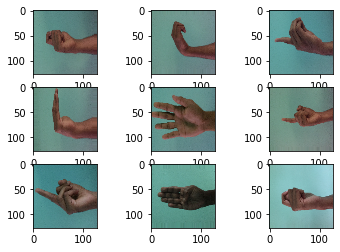

In [4]:
# generate samples and plot
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = training_set.next()
    image = batch[0]
    plt.imshow(image[1])

#show the figure
pyplot.show()

In [5]:
#Training the network

history = classifier.fit_generator(
        training_set,
        steps_per_epoch = 200,
        epochs = 10,
        validation_data = test_set,
        validation_steps = 20)

W0725 02:32:25.738783 37724 deprecation.py:323] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0725 02:32:25.785658 37724 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
200/200 [==============================] - 379s 2s/step - loss: 0.6718 - acc: 0.8248 - val_loss: 0.6977 - val_acc: 0.8245
Epoch 2/10
200/200 [==============================] - 373s 2s/step - loss: 0.0032 - acc: 0.9996 - val_loss: 0.7077 - val_acc: 0.8679
Epoch 3/10
200/200 [==============================] - 374s 2s/step - loss: 0.0165 - acc: 0.9946 - val_loss: 0.7700 - val_acc: 0.8585
Epoch 4/10
200/200 [==============================] - 374s 2s/step - loss: 4.4169e-04 - acc: 1.0000 - val_loss: 0.8060 - val_acc: 0.8528
Epoch 5/10
200/200 [==============================] - 372s 2s/step - loss: 1.8281e-04 - acc: 1.0000 - val_loss: 0.8287 - val_acc: 0.8792
Epoch 6/10
200/200 [==============================] - 373s 2s/step - loss: 8.4435e-05 - acc: 1.0000 - val_loss: 0.8592 - val_acc: 0.8698
Epoch 7/10
200/200 [==============================] - 372s 2s/step - loss: 5.8910e-05 - acc: 1.0000 - val_loss: 0.9514 - val_acc: 0.8566
Epoch 8/10
200/200 [==============================] -